In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [71]:
#Datasets used for plotting: train dataset from 1.1, test dataset, and location dataset
#Enter your path for files
case_train = pd.read_csv("cases_2021_train.csv")
case_test = pd.read_csv("cases_2021_test.csv")
location_data = pd.read_csv("location_2021.csv")

In [72]:
#same step from 1.1
case_train.loc[(case_train['outcome'] == "recovered") | (case_train['outcome'] == "Recovered"),'outcome_group']="recovered"
case_train.loc[(case_train['outcome'] == "Alive") | (case_train['outcome'] == "Receiving Treatment")| (case_train['outcome'] == "Stable")| (case_train['outcome'] == "Under treatment")
               |(case_train['outcome'] == "recovering at home 03.03.2020")| (case_train['outcome'] == "released from quarantine")| (case_train['outcome'] == "stable")
               |(case_train['outcome'] == "stable condition"),'outcome_group']="nonhospitalized"
case_train.loc[(case_train['outcome'] == "Dead") | (case_train['outcome'] == "Death")| (case_train['outcome'] == "Deceased")| (case_train['outcome'] == "Died")| (case_train['outcome'] == "death")| (case_train['outcome'] == "died"),'outcome_group']="deceased"
case_train.loc[(case_train['outcome'] == "Discharged") | (case_train['outcome'] == "Discharged from hospital")| (case_train['outcome'] == "discharged")| (case_train['outcome'] == "Hospitalized")| (case_train['outcome'] == "critical condition")| (case_train['outcome'] == "discharge"),'outcome_group']="hospitalized"

In [73]:
#same step from 1.1
case_train = case_train.drop('outcome', axis=1)

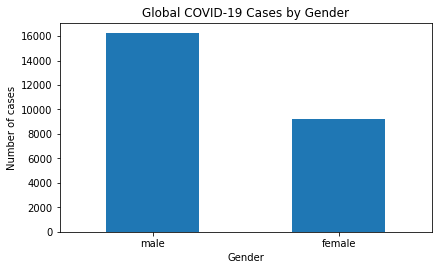

In [74]:
#1.3 Exploratory Data Analysis (EDA)
#Print the number of cases by gender on train data

top_countries = case_train['sex'].value_counts().head(5)
top_countries.plot(title = "Global COVID-19 Cases by Gender", kind = "bar")
plt.tight_layout()
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)
plt.show()

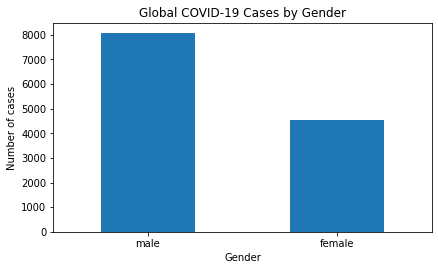

In [75]:
#1.3 Exploratory Data Analysis (EDA)
#Print the number of cases by gender on test data

top_countries = case_test['sex'].value_counts().head(5)
top_countries.plot(title = "Global COVID-19 Cases by Gender", kind = "bar")
plt.tight_layout()
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)
plt.show()

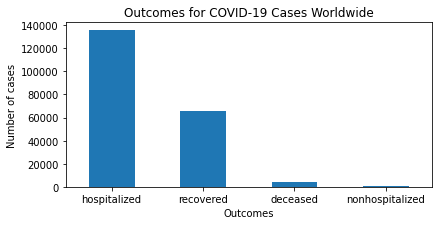

In [76]:
#1.3 Exploratory Data Analysis (EDA)
#Showing relation between outomce group and number of cases on train_data

outcomes_visualization = case_train['outcome_group'].value_counts()
outcomes_visualization.plot(title = "Outcomes for COVID-19 Cases Worldwide", kind = "bar")
plt.tight_layout()
plt.xlabel('Outcomes')
plt.ylabel('Number of cases')
plt.xticks(rotation = 0)
plt.show()

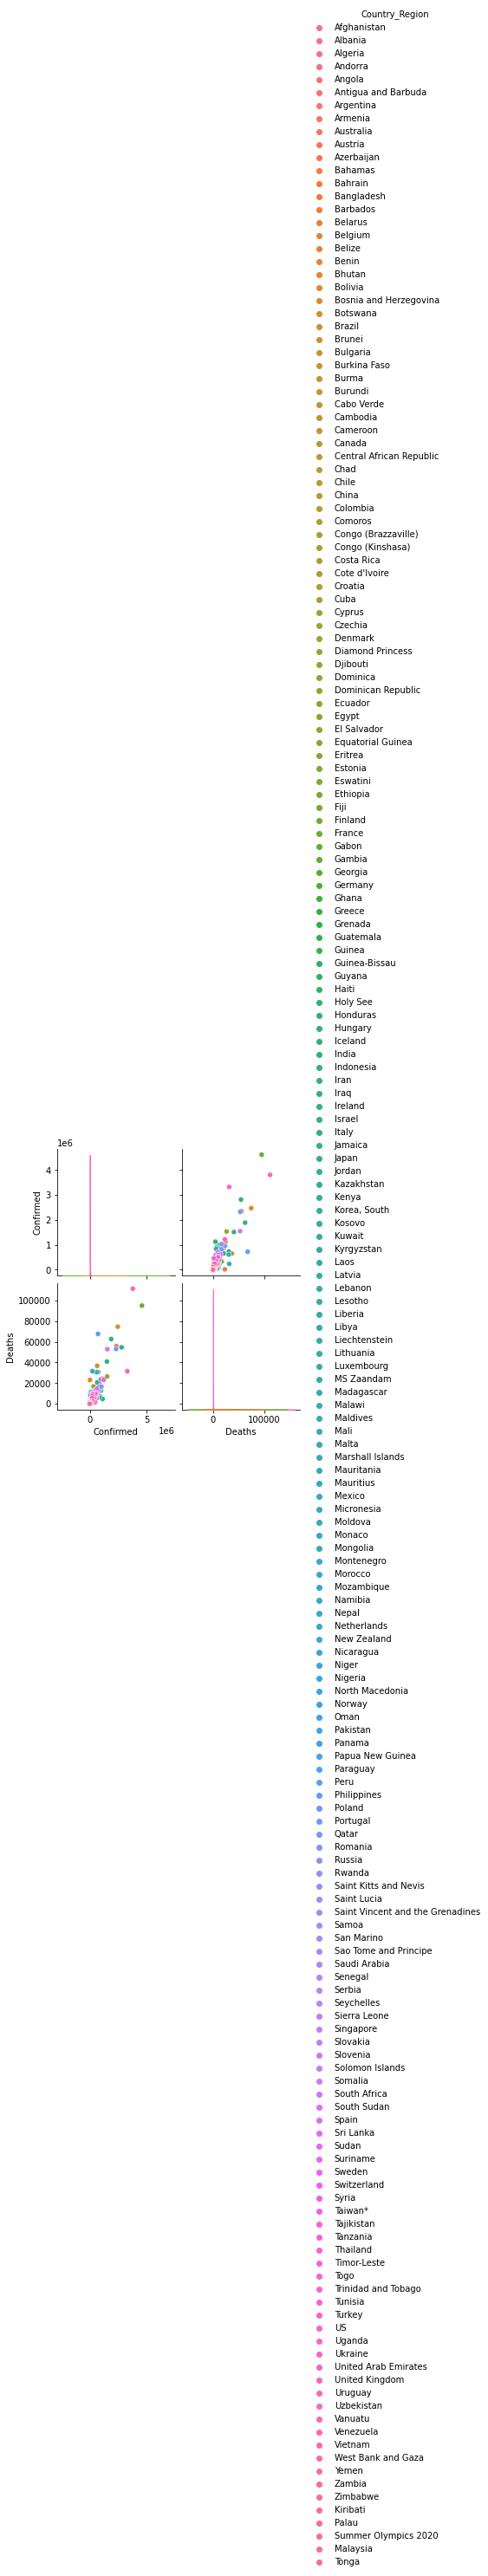

In [77]:
#1.3 Pairplot on location_data
plot_data=location_data[['Confirmed','Deaths','Country_Region']]
sns.pairplot(plot_data,hue="Country_Region")

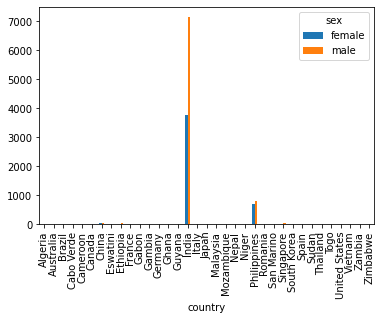

In [78]:
#1.3 Graph showing number of male and female case w.r.t country in test dataset
case_test.groupby(["country", "sex"]).size().unstack(level=1).plot(kind='bar')

In [79]:
#Printing number of missing values for all attributes for all three datasets
case_test.isnull().sum(axis = 0)

age                        90013
sex                        88765
province                     296
country                        1
latitude                       0
longitude                      0
date_confirmation             23
additional_information     95206
source                      9160
chronic_disease_binary         0
outcome_group             101387
dtype: int64

In [80]:
case_train.isnull().sum(axis = 0)

age                       182793
sex                       180362
province                     604
country                        1
latitude                       0
longitude                      0
date_confirmation             51
additional_information    193444
source                     18394
chronic_disease_binary         0
outcome_group                  0
dtype: int64

In [81]:
location_data.isnull().sum(axis = 0)

Province_State          174
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3275
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      48
dtype: int64